In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
train=pd.read_csv(r"C:\Users\ELCOT\Desktop\insurance\train_Df64byy.csv")
test=pd.read_csv(r"C:\Users\ELCOT\Desktop\insurance\test_YCcRUnU.csv")

In [3]:
#check and read the dataset 
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [4]:
train.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [6]:
# Check for missing values in train dataset
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [7]:
# Regularise the data in same type
train['Holding_Policy_Duration']=train['Holding_Policy_Duration'].replace(['14+'],'15')  

In [8]:
# fill the missing values of numeric data type by median train dataset
train['Holding_Policy_Duration']=train['Holding_Policy_Duration'].fillna(train['Holding_Policy_Duration'].median()) 

In [9]:
# # fill the missing values of categoricl data type by mode in train dataset
train['Health Indicator']=train['Health Indicator'].fillna(train['Health Indicator'].mode()[0])  
train['Holding_Policy_Type']=train['Holding_Policy_Type'].fillna(train['Holding_Policy_Type'].mode()[0])

In [10]:
train.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [11]:
# Check for missing values in test dataset
test.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [12]:
# fill the missing values of numeric data type by median test dataset
test['Holding_Policy_Duration']=test['Holding_Policy_Duration'].replace(['14+'],'15')  
test['Holding_Policy_Duration']=test['Holding_Policy_Duration'].fillna(train['Holding_Policy_Duration'].median()) 

In [13]:
# # fill the missing values of categoricl data type by mode in test dataset
test['Health Indicator']=test['Health Indicator'].fillna(train['Health Indicator'].mode()[0])  
test['Holding_Policy_Type']=test['Holding_Policy_Type'].fillna(train['Holding_Policy_Type'].mode()[0])

In [14]:
test.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

In [15]:
# take log on numerical value for normalisation
train['Reco_Policy_Premium']=np.log(train['Reco_Policy_Premium'])
train['Upper_Age']=np.log(train['Upper_Age'])
train['Lower_Age']=np.log(train['Lower_Age'])

<AxesSubplot:xlabel='City_Code', ylabel='count'>

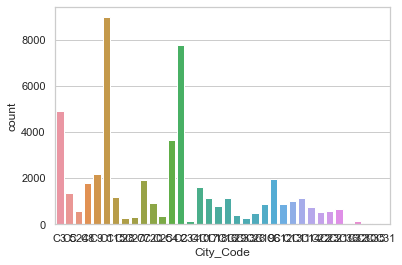

In [16]:
# Exploratory Data Analysis
sns.countplot(train['City_Code'])

<AxesSubplot:xlabel='Accomodation_Type', ylabel='count'>

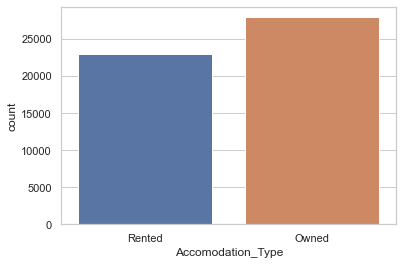

In [17]:
sns.countplot(train['Accomodation_Type'])

<AxesSubplot:xlabel='Reco_Insurance_Type', ylabel='count'>

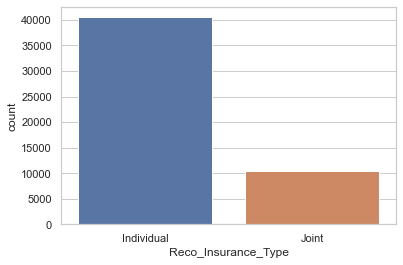

In [18]:
sns.countplot(train['Reco_Insurance_Type'])

<AxesSubplot:xlabel='Upper_Age', ylabel='Density'>

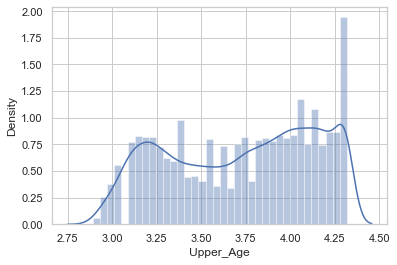

In [19]:
sns.distplot(train['Upper_Age'])

<AxesSubplot:xlabel='Lower_Age', ylabel='Density'>

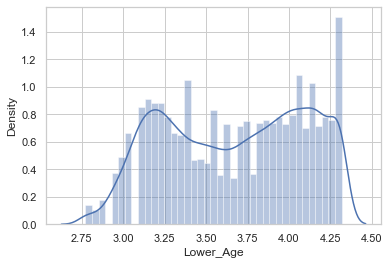

In [20]:
sns.distplot(train['Lower_Age'])

<AxesSubplot:xlabel='Is_Spouse', ylabel='count'>

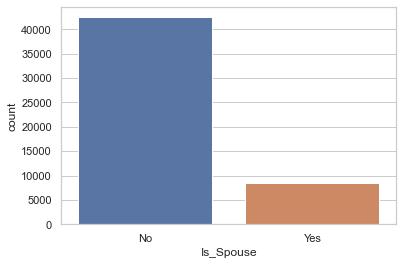

In [21]:
sns.countplot(train['Is_Spouse'])

<AxesSubplot:xlabel='Health Indicator', ylabel='count'>

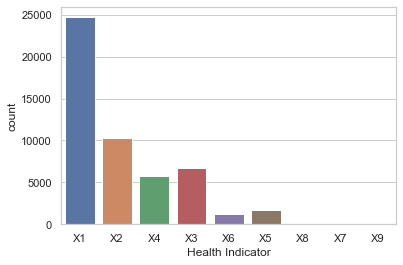

In [22]:
sns.countplot(train['Health Indicator'])

<AxesSubplot:xlabel='Holding_Policy_Duration', ylabel='Density'>

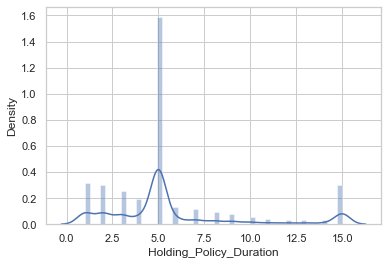

In [23]:
sns.distplot(train['Holding_Policy_Duration'])

<AxesSubplot:xlabel='Holding_Policy_Type', ylabel='count'>

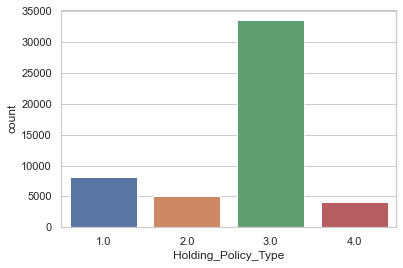

In [24]:
sns.countplot(train['Holding_Policy_Type'])

<AxesSubplot:xlabel='Reco_Policy_Cat', ylabel='count'>

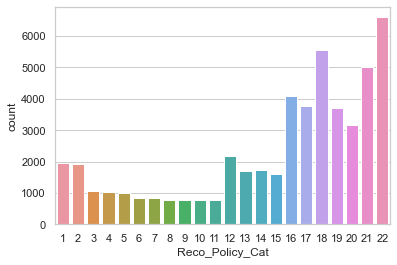

In [25]:
sns.countplot(train['Reco_Policy_Cat'])

<AxesSubplot:xlabel='Reco_Policy_Premium', ylabel='Density'>

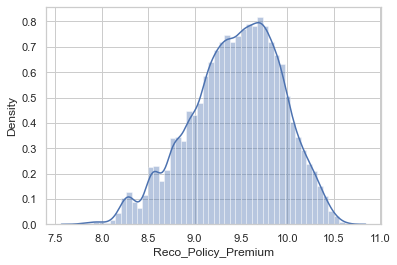

In [26]:
sns.distplot(train['Reco_Policy_Premium'])

<AxesSubplot:xlabel='Response', ylabel='count'>

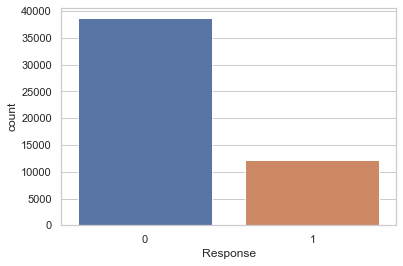

In [27]:
sns.countplot(train['Response'])

<AxesSubplot:>

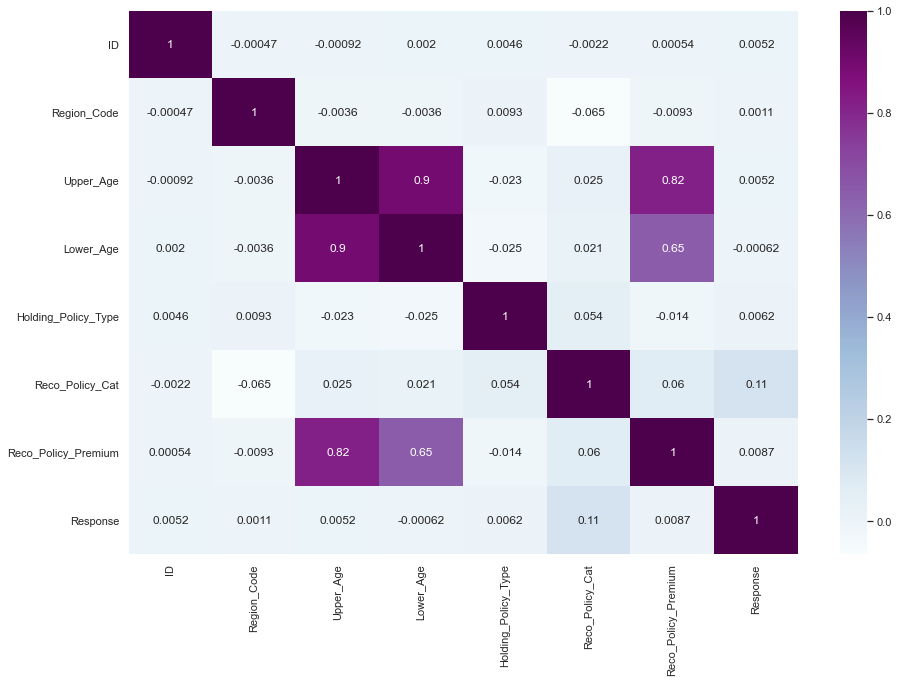

In [28]:
# correalation matrix
corr=train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap="BuPu")

## Data Processing

In [29]:
ID=test.ID

In [30]:
train=train.drop('ID',axis=1)
test=test.drop('ID',axis=1)

In [31]:
train.head(10)

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,3.583519,3.583519,No,X1,15,3.0,22,9.361171,0
1,C5,1117,Owned,Joint,4.317488,3.091042,No,X2,5.0,3.0,22,10.325810,0
2,C5,3732,Owned,Individual,3.465736,3.465736,No,X1,1.0,1.0,19,8.915969,1
3,C24,4378,Owned,Joint,3.951244,3.871201,No,X1,15,3.0,19,9.785830,0
4,C8,2190,Rented,Individual,3.784190,3.784190,No,X2,3.0,1.0,16,9.249946,0
5,C9,1785,Rented,Individual,3.951244,3.951244,No,X2,5.0,1.0,22,9.633252,1
6,C3,679,Owned,Individual,3.332205,3.332205,No,X1,5.0,3.0,17,9.272376,0
7,C1,3175,Owned,Joint,4.317488,4.290459,Yes,X4,9.0,4.0,17,10.286843,1
8,C15,3497,Owned,Joint,3.951244,3.761200,No,X1,14.0,3.0,1,10.214026,0
9,C1,530,Owned,Joint,4.077537,3.258097,Yes,X1,7.0,4.0,18,9.957066,1


In [32]:
num_feat = ['Upper_Age','Lower_Age']

In [33]:
## apply label encoder on train dataset to convert catergorical into numeric labels
from sklearn.preprocessing import LabelEncoder
cols= ['City_Code', 'Region_Code', 'Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Holding_Policy_Type','Reco_Policy_Cat']
le=LabelEncoder()
for col in cols:
    train[col]=le.fit_transform(train[col])

In [34]:
## Normalisation and standardisation of numerical labels in train dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
train[num_feat] = ss.fit_transform(train[num_feat])


mm = MinMaxScaler()
train[['Reco_Policy_Premium']] = mm.fit_transform(train[['Reco_Policy_Premium']])

In [35]:
## apply label encoder on test dataset to convert catergorical into numeric labels
from sklearn.preprocessing import LabelEncoder
cols= ['City_Code', 'Region_Code', 'Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Holding_Policy_Type','Reco_Policy_Cat']
le=LabelEncoder()
for col in cols:
    test[col]=le.fit_transform(test[col])

In [36]:
#Normalisation and standardisation of numerical labels in test dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
test[num_feat] = ss.fit_transform(test[num_feat])


mm = MinMaxScaler()
test[['Reco_Policy_Premium']] = mm.fit_transform(test[['Reco_Policy_Premium']])

## Data Modelling and Evaluation

In [37]:
from sklearn.model_selection import train_test_split

train_target=train['Response']
train=train.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)

In [38]:
x_train.columns

Index(['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Health Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium'],
      dtype='object')

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report

In [40]:
## Random Forest classifier
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier(class_weight='balanced')
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 5, verbose= 1, random_state= 42, n_jobs = -1)
model.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=42, verbose=1)

In [41]:
y_pred=model.predict(x_test)

In [42]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.48      0.61      9607
           1       0.30      0.69      0.42      3114

    accuracy                           0.53     12721
   macro avg       0.57      0.59      0.51     12721
weighted avg       0.70      0.53      0.56     12721



In [43]:
y_score = model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

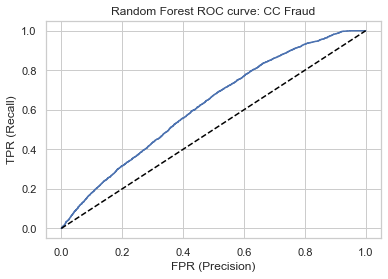

Area under curve (AUC):  0.6216508193989089


In [44]:
plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.title('Random Forest ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [45]:
roc_auc_score(y_test, y_score)

0.6216508193989089

In [46]:
## Cat boost classifier
cat_model = CatBoostClassifier()
cat_model = cat_model.fit(x_train, y_train, cat_features = cols, eval_set = (x_test, y_test), early_stopping_rounds = 5, verbose = 1)

predictions = [pred[1] for pred in cat_model.predict_proba(x_test)]
print('Validation ROC AUC Score:', roc_auc_score(y_test, predictions, average = 'weighted'))

Learning rate set to 0.077906
0:	learn: 0.6659832	test: 0.6667956	best: 0.6667956 (0)	total: 237ms	remaining: 3m 56s
1:	learn: 0.6427366	test: 0.6436721	best: 0.6436721 (1)	total: 402ms	remaining: 3m 20s
2:	learn: 0.6235999	test: 0.6247180	best: 0.6247180 (2)	total: 614ms	remaining: 3m 24s
3:	learn: 0.6075476	test: 0.6094332	best: 0.6094332 (3)	total: 855ms	remaining: 3m 32s
4:	learn: 0.5922042	test: 0.5946526	best: 0.5946526 (4)	total: 997ms	remaining: 3m 18s
5:	learn: 0.5812969	test: 0.5839169	best: 0.5839169 (5)	total: 1.11s	remaining: 3m 4s
6:	learn: 0.5716177	test: 0.5745491	best: 0.5745491 (6)	total: 1.24s	remaining: 2m 55s
7:	learn: 0.5653699	test: 0.5686163	best: 0.5686163 (7)	total: 1.28s	remaining: 2m 39s
8:	learn: 0.5491424	test: 0.5543281	best: 0.5543281 (8)	total: 1.4s	remaining: 2m 34s
9:	learn: 0.5352633	test: 0.5417005	best: 0.5417005 (9)	total: 1.55s	remaining: 2m 33s
10:	learn: 0.5239951	test: 0.5319555	best: 0.5319555 (10)	total: 1.67s	remaining: 2m 30s
11:	learn: 0.

94:	learn: 0.4425847	test: 0.4510998	best: 0.4510998 (94)	total: 15.1s	remaining: 2m 23s
95:	learn: 0.4424934	test: 0.4511034	best: 0.4510998 (94)	total: 15.3s	remaining: 2m 23s
96:	learn: 0.4423308	test: 0.4510806	best: 0.4510806 (96)	total: 15.6s	remaining: 2m 25s
97:	learn: 0.4422373	test: 0.4510805	best: 0.4510805 (97)	total: 15.9s	remaining: 2m 26s
98:	learn: 0.4421645	test: 0.4510462	best: 0.4510462 (98)	total: 16.1s	remaining: 2m 26s
99:	learn: 0.4420363	test: 0.4509016	best: 0.4509016 (99)	total: 16.4s	remaining: 2m 27s
100:	learn: 0.4419631	test: 0.4508333	best: 0.4508333 (100)	total: 16.6s	remaining: 2m 27s
101:	learn: 0.4419181	test: 0.4508021	best: 0.4508021 (101)	total: 16.8s	remaining: 2m 27s
102:	learn: 0.4417498	test: 0.4506570	best: 0.4506570 (102)	total: 17s	remaining: 2m 28s
103:	learn: 0.4416897	test: 0.4506821	best: 0.4506570 (102)	total: 17.2s	remaining: 2m 28s
104:	learn: 0.4414868	test: 0.4505013	best: 0.4505013 (104)	total: 17.4s	remaining: 2m 27s
105:	learn: 0

In [47]:
# Prediction on test dataset
Preds1=cat_model.predict(test)

In [48]:
submission = pd.DataFrame(data = {'ID': ID, 'Response': Preds1})
submission.to_csv('catboost2.csv', index = False)

# conclusion:
Finally i got 0.79 AUC-ROC score on catboost classifier model.
1)individuals insurace type is have more  response when compared to joint health insurance, 2)
the person who dont have spouse which is more likely to have health insurance compared to having spouse. 3)
overall there is less customers respond for the health insurance policy.